# Test RF on new data

In [2]:
# install.packages("rPython",repos='http://cran.us.r-project.org')
# # “package ‘rPython’ is not available (for R version 3.6.3)”

# packageurl <- "https://cran.r-project.org/src/contrib/Archive/rPython/rPython_0.0-6.tar.gz"
# install.packages(packageurl, repos=NULL, type="source")
# # “installation of package ‘/tmp/Rtmp4Wu00p/downloaded_packages/rPython_0.0-6.tar.gz’ had non-zero exit status”

# wget https://cran.r-project.org/src/contrib/Archive/rPython/rPython_0.0-6.tar.gz
# R CMD INSTALL ggplot2_0.9.1.tar.gz

In [3]:
# # this worked:
# require(devtools)
# install_version("rPython", version = "0.0-6", repos = "http://cran.us.r-project.org")

In [4]:
# install.packages("rgl", dependencies = TRUE)
# Warning message in install.packages("rgl", dependencies = TRUE):
# “installation of package ‘rgl’ had non-zero exit status”
# Warning message in install.packages("rgl", dependencies = TRUE):
# “installation of package ‘alphashape3d’ had non-zero exit status”

In [5]:
# # this worked:
# install.packages("devtools")
# library(devtools)
# install.packages("rgl")
# library(rgl)

In [6]:
# Had to install magick via:
# sudo apt-get install libmagick++-dev

In [7]:
# install.packages("stringdist")

In [15]:
library(dplyr)
library(data.table)
library(partykit)
library(tictoc)
library(caret)
library(e1071)
library(randomForest)
library(ranger)

#for 3d plotting
library(akima)
library(plotly)

# for prep data
library(rPython)
library(stringr)
library(pbapply)
library(stringdist)
library(data.table)

getwd()

[1] "/home/jupyter/local/Domains_202003/scripts/phaseII_gcloudaccess"

In [42]:

source('../orig/functions.R')

source('../orig/functions_models.R')

source('functions_eval.R')


## load data & model

ranger_03 was trained in dtree_xl notebook on the following predictors:


renewal_status ~

tld

registrar

reseller

reseller_country

region

reg_period

sld_type

sld_length

day_domains

gibb_score

pattern_domain_count

In [20]:
# system("gsutil cp gs://data_outputt/output/expiry_data /home/jupyter/local/Domains_202003/data/expiry_data")
# expiry_data <- readRDS("/home/jupyter/local/Domains_202003/data/expiry_data")

# system("gsutil cp gs://data_outputt/output/ranger_03 /home/jupyter/local/Domains_202003/data/ranger_03")
load('../../data/ranger_03')


In [21]:
ls()

[1] "apply_standard_adjustments"      "basic_prep_domain_data"         
 [3] "build_model_first_renewal"       "build_model_second_renewal"     
 [5] "calc_auc"                        "change.colnames"                
 [7] "chart_lift"                      "expiry_test_df"                 
 [9] "expiry_test_prepped_2"           "get_cluster_data"               
[11] "get_cluster_large"               "get_df_npv"                     
[13] "get_domain_npv"                  "get_domain_type"                
[15] "get_pattern_score"               "get_renewal_status"             
[17] "intersect2"                      "list_predict_first_renewal"     
[19] "list_predict_second_renewal"     "mass_build_model_first_renewal" 
[21] "mass_build_model_second_renewal" "mass_predict_first_renewal"     
[23] "mass_predict_second_renewal"     "mass_prep_data"                 
[25] "na.zero"                         "newreg_data_prep"               
[27] "newreg_data_rename"              "newreg_data_select"             
[29] "plot_gains"                      "plot_multigains"                
[31] "predict_first_renewal"           "predict_second_renewal"         
[33] "prep_domain_data"                "ranger_03"                      
[35] "save_object"                     "unzip.file"

## create test train split

In [6]:
# set.seed(0)
# train_index <- sample(1:nrow(expiry_data), 0.8 * nrow(expiry_data))
# test_index <- setdiff(1:nrow(expiry_data), train_index)

# expiry_train <- expiry_data[train_index,]
# expiry_test <- expiry_data[test_index,]

In [7]:
# Not Renewd    Renewed 
#  0.8257068  0.1742932 

# Not Renewd    Renewed 
#  0.8248038  0.1751962 

# prop.table(table(expiry_train$renewal_status))
# prop.table(table(expiry_test$renewal_status))


Not Renewd    Renewed 
 0.8257068  0.1742932 


Not Renewd    Renewed 
 0.8248038  0.1751962 

In [8]:
# saveRDS(expiry_train,"../../data/output/expiry_train")
# saveRDS(expiry_test,"../../data/output/expiry_test")
# system("gsutil cp /home/jupyter/local/Domains_202003/data/output/* gs://data_outputt/output/")

# expiry_train <- readRDS(file.path('../../data/output/',"expiry_data"))

In [12]:
# expiry_data <- readRDS("/home/jupyter/local/Domains_202003/data/expiry_data")
# expiry_train <- readRDS("/home/jupyter/local/Domains_202003/data/expiry_train")
# expiry_test <- readRDS("/home/jupyter/local/Domains_202003/data/expiry_test")

# expiry_test_prepped <- readRDS("/home/jupyter/local/Domains_202003/data/output/expiry_test_prepped")

expiry_test_prepped_2 <- readRDS("/home/jupyter/local/Domains_202003/data/output/expiry_test_prepped_2")

# system("gsutil cp gs://data_outputt/output/ranger_03 /home/jupyter/local/Domains_202003/data/ranger_03")
# load('../../data/ranger_03')


In [13]:
# dim(expiry_test)
# dim(expiry_test_prepped)

In [14]:
length(expiry_test_prepped_2)

[1] 1765

In [16]:

expiry_test_df <- rbindlist(expiry_test_prepped_2, fill=TRUE)

In [17]:
dim(expiry_test_df)

[1] 348591     39

## gen gibb score

In [ ]:
# see script prep_expiry.R

# python.load("../orig/gibb_detect/gib_detect.py",TRUE)

# suppressWarnings(expiry_train_prepped <- prep_domain_data(expiry_train))

# ls()


# suppressWarnings(expiry_test_prepped <- prep_domain_data(expiry_test))

# dim(expiry_train)
# dim(expiry_train_prepped)
# dim(expiry_test)
# dim(expiry_test_prepped)

# saveRDS(expiry_train_prepped,"../../data/output/expiry_train_prepped")
# saveRDS(expiry_test_prepped,"../../data/output/expiry_test_prepped")
# system("gsutil cp /home/jupyter/local/Domains_202003/data/output/* gs://data_outputt/output/")

# # expiry_train <- readRDS(file.path('../../data/output/',"expiry_data"))

# prep_domain_data<-function(domain_data) {
# domain_data<-basic_prep_domain_data(domain_data)
# # python.load("/home/radmin/npv_project/gibb_detect/gib_detect.py",TRUE)
# # 



# # 
# #Get Gibberish Scores for all SLDs

# domain_data$gibb_score<-mapply(python.call, "gibberish_test", domain_data$sld)

# #Get Coeff-Variation on all days
# domain_data<-pblapply(split(domain_data, domain_data$creation_date), 
#                     function(i) get_cluster_large(i, 0.3, 30000))
# domain_data<-rbindlist(domain_data)
# domain_data$gibb_score<-round(domain_data$gibb_score*100,2)

# return(domain_data)
# }



# python.load("../orig/gibb_detect/gib_detect_train.py",TRUE)


# python.load("../orig/gibb_detect/gib_detect.py",TRUE)

# # 
# #Get Gibberish Scores for all SLDs

# domain_data$gibb_score<-mapply(python.call, "gibberish_test", domain_data$sld)

# #Get Coeff-Variation on all days
# domain_data<-pblapply(split(domain_data, domain_data$creation_date), 
#                     function(i) get_cluster_large(i, 0.3, 30000))
# domain_data<-rbindlist(domain_data)
# domain_data$gibb_score<-round(domain_data$gibb_score*100,2)

In [19]:
as.data.frame(colSums(is.na(expiry_test_df)))

,colSums(is.na(expiry_test_df))
,<dbl>
renewal_type,0
renewed_count,0
expiry_date,0
domain_id,0
domain,0
creation_date,0
status,0
tld,0
registrar,0


## test ranger_03 on expiry_test

In [18]:
# Aggregating predictions.. Progress: 72%. Estimated remaining time: 12 seconds.
# model predict: 86.684 sec elapsed
# eval saving: 0.146 sec elapsed

# tic("model predict")
# ranger_predict_03_exptest <- predict(ranger_03, 
#                           data = expiry_test_prepped,
#                           type="response")$predictions
# toc()

# tic("eval saving")

# ranger_predict_03_exptest <- as.data.frame(ranger_predict_03_exptest)$Renewed

# save(ranger_predict_03_exptest, 
#      file="../../data/output/ranger_predict_03_exptest")
# toc()


Aggregating predictions.. Progress: 72%. Estimated remaining time: 12 seconds.
model predict: 86.684 sec elapsed
eval saving: 0.146 sec elapsed


In [23]:
load("../../data/output/ranger_predict_03_exptest")

In [24]:
head(ranger_predict_03_exptest)

[1] 0.29780992 0.18199561 0.22687120 0.02133564 0.19347952 0.43249667

In [25]:
length(ranger_predict_03_exptest)

[1] 348591

In [28]:
dim(expiry_test_df)

[1] 348591     39

In [30]:
head((expiry_test_df)$renewal_status)

[1] Renewed    Not Renewd Renewed    Not Renewd Not Renewd Renewed   
Levels: Not Renewd Renewed

In [29]:
# ranger_03_pred_df = data.frame("actual" = expiry_test_prepped$renewal_status,
#           "predicted" = ranger_predict_03_exptest)

# lift df: 23.675 sec elapsed
# gains plot: 0.046 sec elapsed
# auc: 0.007 sec elapsed
# tic("lift df")
# lift_df_ranger_03 <- chart_lift(pred_df = ranger_03_pred_df,
#                         dep_var = "actual",
#                         pred_var = "predicted")

# toc()
# tic("gains plot")
# gains_plot_ranger_03 <- plot_gains (lift_df_ranger_03) 

# toc()
# tic("auc")
# auc_ranger_03 <- calc_auc(lift_df_ranger_03)
# toc()


# saveRDS(lift_df_ranger_03, file.path('../../data/',"lift_df_ranger_03"))


In [33]:
file_list <- c("lift_df_segglm",
                    "lift_df_bendtr",
                    "lift_df_ranger3",
                    "lift_df_ranger_03"
              )
assign(file_list[1], readRDS(sprintf("../../data/%s", file_list[1])))
assign(file_list[2], readRDS(sprintf("../../data/%s", file_list[2])))
assign(file_list[3], readRDS(sprintf("../../data/%s", file_list[3])))
assign(file_list[4], readRDS(sprintf("../../data/%s", file_list[4])))
     

In [34]:
plot_multigains_03_summ <- plot_multigains(
    lift_df_list=list(
        seg_glm = lift_df_segglm, 
        ben_dtr = lift_df_bendtr,
        rf_500tr = lift_df_ranger3,
        rf_newd = lift_df_ranger_03),
    auc_list = list(
        seg_glm = calc_auc(lift_df_segglm), 
        ben_dtr= calc_auc(lift_df_bendtr), 
        rf_500tr= calc_auc(lift_df_ranger3), 
        rf_newd= calc_auc(lift_df_ranger_03)))
png(file = "../../data/output/plot_multigains_03_newdata_summ.png",
    width = 500, height = 375)
plot(plot_multigains_03_summ)
dev.off()

png 
  2

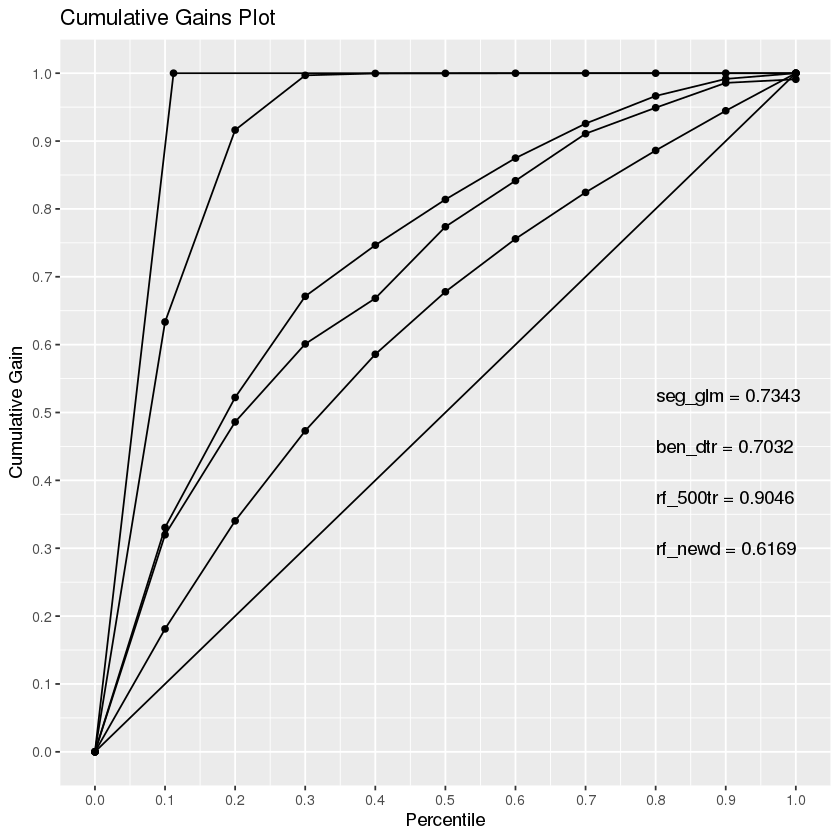

In [35]:
plot_multigains_03_summ

In [46]:
system("gsutil cp /home/jupyter/local/Domains_202003/data/output/* gs://data_outputt/output/")

In [47]:
lift_df_ranger_03

P,actu_renwd2,gain,lift
<dbl>,<int>,<dbl>,<dbl>
0.1,11057,0.1811198,1.811198
0.2,20777,0.3403387,1.701694
0.3,28877,0.4730212,1.576737
0.4,35763,0.5858177,1.464544
0.5,41386,0.6779256,1.355851
0.6,46146,0.7558970,1.259828
0.7,50326,0.8243677,1.177668
0.8,54097,0.8861388,1.107673
0.9,57668,0.9446337,1.049593


lift_df_ranger3

In [49]:
lift_df_segglm

P,actu_renwd2,gain,lift
<dbl>,<int>,<dbl>,<dbl>
0.1,14576,0.3305215,3.305215
0.2,23027,0.5221542,2.610771
0.3,29601,0.6712245,2.237415
0.4,32925,0.7465986,1.866497
0.5,35893,0.8139002,1.627800
0.6,38582,0.8748753,1.458125
0.7,40827,0.9257823,1.322546
0.8,42622,0.9664853,1.208107
0.9,43729,0.9915873,1.101764


# how well does seg_glm perf on this data?

In [56]:
# filename='first_renewal_model'
# system(paste(sprintf("gsutil cp gs://data_input/%s /home/jupyter/local/Domains_202003/data/", filename)))
# assign(filename, readRDS(sprintf("../../data/%s", filename)))
# rm(first_renewal_model)

In [36]:
filename='first_renewal_model_train' # trained in training subset, like ranger_03
# system(paste(sprintf("gsutil cp gs://data_input/%s /home/jupyter/local/Domains_202003/data/", filename)))
assign(filename, readRDS(sprintf("../../data/%s", filename)))

# need to use predict from original functions

In [44]:
# seg_glm new_data predict: 4.206 sec elapsed

# tic("seg_glm new_data predict")
# seg_glm_exptest <- mass_predict_first_renewal(expiry_test_prepped_2, first_renewal_model_train)
# toc()
# saveRDS(seg_glm_exptest,"../../data/output/seg_glm_exptest")


In [ ]:
# seg_glm_exptest <- readRDS("../../data/output/seg_glm_exptest")

In [49]:
# colSums(is.na(["first_renewal_prediction"]))
# seg_glm_exptest[, sum(is.na(.SD)),  .SDcols = 1:39]

seg_glm_exptest %>% summarise_all(~ sum(is.na(.)))

renewal_type,renewed_count,expiry_date,domain_id,domain,creation_date,status,tld,registrar,reseller,⋯,sld_length,sld_type2,day_domains,log_reg_arpt,gibb_score,cluster,pattern,pattern_score,pattern_domain_count,first_renewal_prediction
<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,218958


In [51]:
218958/dim(seg_glm_exptest)[1]

[1] 0.6281229

In [54]:
head(seg_glm_exptest$first_renewal_prediction[!is.na(seg_glm_exptest$first_renewal_prediction)])

[1] 0.5617359 0.4022232 0.5167585 0.4731483 0.3451327 0.4070107

In [56]:
seg_glm_exptest_pred_df = data.frame("actual" = expiry_test_df$renewal_status,
          "predicted" = seg_glm_exptest$first_renewal_prediction)

In [58]:
# lift df: 0.817 sec elapsed
# gains plot: 0.029 sec elapsed
# auc: 0.006 sec elapsed

tic("lift df")
lift_df_seg_glm_exptest <- chart_lift(pred_df = seg_glm_exptest_pred_df,
                        dep_var = "actual",
                        pred_var = "predicted")

toc()
tic("gains plot")
gains_plot_seg_glm_exptest <- plot_gains (lift_df_seg_glm_exptest) 

toc()
tic("auc")
auc_seg_glm_exptest<- calc_auc(lift_df_seg_glm_exptest)
toc()


saveRDS(lift_df_seg_glm_exptest, file.path('../../data/',"lift_df_seg_glm_exptest"))

lift df: 0.817 sec elapsed
gains plot: 0.029 sec elapsed
auc: 0.006 sec elapsed


In [70]:
lift_df_seg_glm_exptest

P,actu_renwd2,gain,lift
<dbl>,<int>,<dbl>,<dbl>
0.1,13529,0.2216125,2.2161250
0.2,17149,0.2809101,1.4045505
0.3,19773,0.3238927,1.0796422
0.4,20356,0.3334425,0.8336063
0.5,25173,0.4123477,0.8246953
0.6,34583,0.5664887,0.9441478
0.7,41693,0.6829544,0.9756491
0.8,44718,0.7325056,0.9156320
0.9,50688,0.8302975,0.9225527


In [59]:
plot_multigains_03_summ2 <- plot_multigains(
    lift_df_list=list(
        seg_glm = lift_df_segglm, 
        ben_dtr = lift_df_bendtr,
        rf_500tr = lift_df_ranger3,
        rf_newd = lift_df_ranger_03,
        seg_glm_newd = lift_df_seg_glm_exptest),
    auc_list = list(
        seg_glm = calc_auc(lift_df_segglm), 
        ben_dtr= calc_auc(lift_df_bendtr), 
        rf_500tr= calc_auc(lift_df_ranger3), 
        rf_newd= calc_auc(lift_df_ranger_03), 
        seg_glm_newd= calc_auc(lift_df_seg_glm_exptest)))
png(file = "../../data/output/plot_multigains_03_newdata_summ2.png",
    width = 500, height = 375)
plot(plot_multigains_03_summ2)
dev.off()

png 
  2

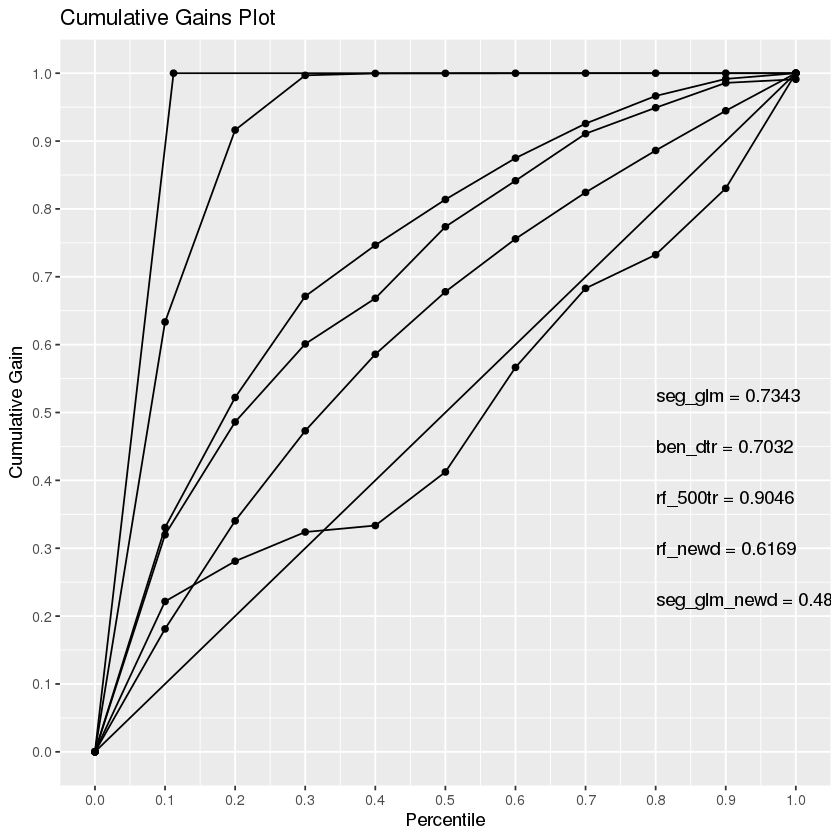

In [60]:
plot_multigains_03_summ2

# but ultimately, client fills NA's with data from "fallback tables", which would improve performance. asked client for script

In [67]:
# from /scripts/nedata_202005/explore

system("gsutil cp gs://data_input/npv_fallback_tables /home/jupyter/local/Domains_202003/data/npv_fallback_tables")

In [68]:
# npv_fallback_tables	
#   fallback tables where we dont have enough training 
#   data for a particular tld-registrar combination

npv_fallback_names <- load("/home/jupyter/local/Domains_202003/data/npv_fallback_tables")
npv_fallback_names

[1] "npv_fallback_first_final"        "npv_fallback_first_geo_arpt"    
 [3] "npv_fallback_first_geo_arpt_tld" "npv_fallback_first_tld_arpt"    
 [5] "npv_fallback_second_final"       "npv_fallback_second_geo"        
 [7] "npv_fallback_second_tld_geo"     "npv_fallback_third_final"       
 [9] "npv_fallback_third_geo"          "npv_fallback_third_tld_geo"

In [64]:
# [1] "npv_fallback_first_final"        "npv_fallback_first_geo_arpt"    
# [3] "npv_fallback_first_geo_arpt_tld" "npv_fallback_first_tld_arpt"    
# [5] "npv_fallback_second_final"       "npv_fallback_second_geo"        
# [7] "npv_fallback_second_tld_geo"     "npv_fallback_third_final"       
# [9] "npv_fallback_third_geo"          "npv_fallback_third_tld_geo" 

In [69]:
head(npv_fallback_first_final)

region,reg_arpt_slab,expiring_domains,renewed_domains,renewal_rate,index
<chr>,<fct>,<int>,<int>,<dbl>,<chr>
China,"(-Inf,0]",35669,2139,0.060,"China(-Inf,0]"
China,"(0,1]",536645,11052,0.021,"China(0,1]"
China,"(1,3]",84869,12063,0.142,"China(1,3]"
China,"(3,5]",1356,340,0.251,"China(3,5]"
China,"(5,10]",177,36,0.203,"China(5,10]"
China,"(10,15]",427,122,0.286,"China(10,15]"


In [64]:
# Questions:
# not enough training means we also don't have "day_domains"?
# npv_fallback_first_final, _geo_arpt? renewal rate by country & buy price
# npv_fallback_first_final$reg_arpt_slab? reg_arpt: the price at which the domain is bought by the reseller 

# Using a decision tree means you don't need to retrain a model but we can do better than simply using a "fall back table" -- can we confirm this with historical data?

Warning message in readChar(con, 5L, useBytes = TRUE):
“cannot open compressed file '/home/jupyter/local/Domains_202003/data/npv_fallback_tables', probable reason 'No such file or directory'”


ERROR: Error in readChar(con, 5L, useBytes = TRUE): cannot open the connection
